In [31]:
from linearmodels import PanelOLS
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS


In [2]:
# Load data
data = pd.read_csv('FinalDataSet.csv')
panel_data = data.set_index(['Country Name', 'Year'])

In [3]:
# Specify dependent and independent variables
dependent_var = panel_data['GDP(milUSD)']
independent_vars = panel_data[['FixedBroadbandPenetration', 'MobileBroadbandPenetration']]
independent_vars = sm.add_constant(independent_vars)  # Add a constant term

In [6]:
independent_vars

,,const,FixedBroadbandPenetration,MobileBroadbandPenetration
Country Name,Year,,,
Austria,2010,1.0,24.518019,33.015
Belgium,2010,1.0,31.009007,9.550
Czechia,2010,1.0,21.607580,5.157
Denmark,2010,1.0,38.055555,63.921
France,2010,1.0,34.169506,35.525
...,...,...,...,...
Sweden,2022,1.0,40.403657,133.154
United Kingdom,2022,1.0,41.484878,114.577
Slovenia,2022,1.0,32.219116,96.522


In [7]:
dependent_var

Country Name    Year
Austria         2010     351323.808
Belgium         2010     434058.868
Czechia         2010     292032.224
Denmark         2010     238555.117
France          2010    2334557.742
                           ...     
Sweden          2022     683909.153
United Kingdom  2022    3678729.617
Slovenia        2022     102014.348
Latvia          2022      74846.879
Lithuania       2022     138355.938
Name: GDP(milUSD), Length: 285, dtype: float64

In [4]:
# Create and fit a Fixed Effects model
fixed_effects_model = PanelOLS(dependent_var, independent_vars, entity_effects=True)
fe_results = fixed_effects_model.fit()

In [12]:
fe_results


Dep. Variable:,GDP(milUSD),R-squared:,0.3474
Estimator:,PanelOLS,R-squared (Between):,0.0410
No. Observations:,285,R-squared (Within):,0.3474
Date:,"Sun, Dec 17 2023",R-squared (Overall):,0.0512
Time:,23:48:03,Log-likelihood,-3838.9
Cov. Estimator:,Unadjusted,,
,,F-statistic:,69.484
Entities:,22,P-value,0.0000
Avg Obs:,12.955,Distribution:,"F(2,261)"
Min Obs:,12.000,,
Max Obs:,13.000,F-statistic (robust):,69.484


## Visualise

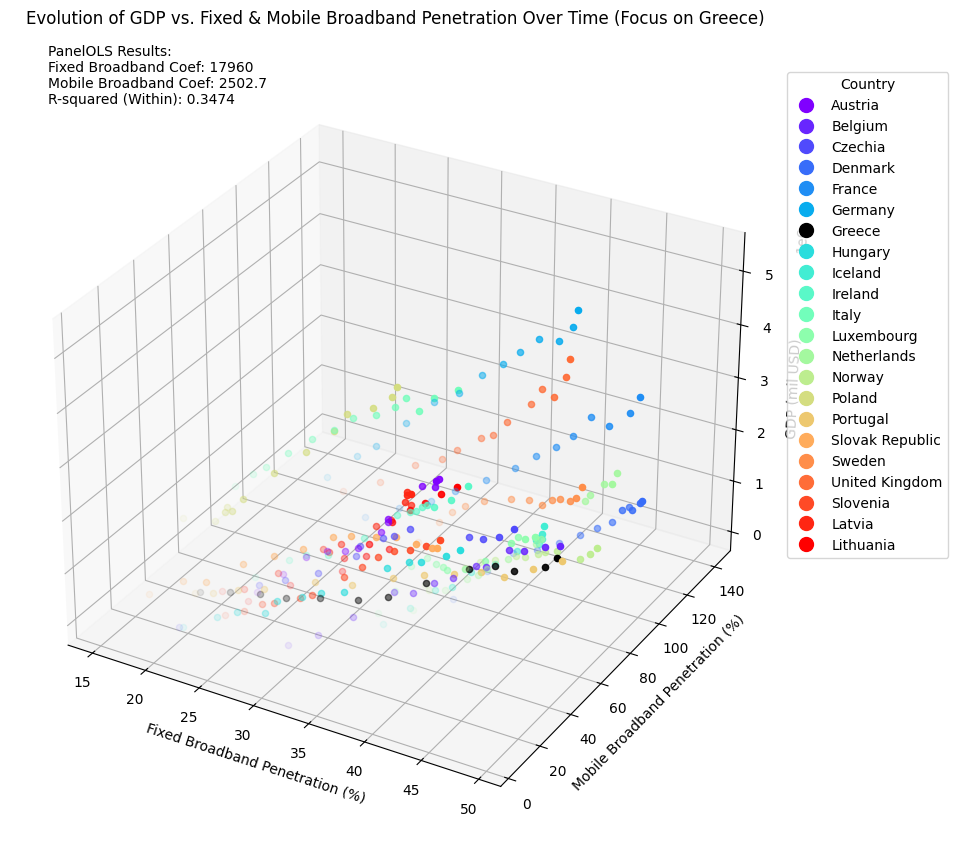

In [27]:
# Extracting unique countries for color coding
countries = data['Country Name'].unique()

# Generating a color map for each country, setting Greece's color to black
colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))
color_map = dict(zip(countries, colors))
color_map['Greece'] = 'black'  # Highlighting Greece

# Assuming these are the results from the PanelOLS model
fixed_broadband_coefficient = 17960
mobile_broadband_coefficient = 2502.7
r_squared_within = 0.3474

# Creating a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting data for each country with decreasing opacity over time
for country in countries:
    country_data = data[data['Country Name'] == country].sort_values(by='Year')
    num_years = len(country_data)
    for i, row in country_data.iterrows():
        alpha = (row['Year'] - country_data['Year'].min() + 1) / num_years  # Increasing opacity over time
        ax.scatter(row['FixedBroadbandPenetration'], row['MobileBroadbandPenetration'], row['GDP(milUSD)'],
                   color=color_map[country], alpha=alpha)

# Setting labels and title
ax.set_xlabel('Fixed Broadband Penetration (%)')
ax.set_ylabel('Mobile Broadband Penetration (%)')
ax.set_zlabel('GDP (mil USD)')
ax.set_title('Evolution of GDP vs. Fixed & Mobile Broadband Penetration Over Time (Focus on Greece)', pad=30)

# Annotating with PanelOLS results
results_text = f"PanelOLS Results:\nFixed Broadband Coef: {fixed_broadband_coefficient}\nMobile Broadband Coef: {mobile_broadband_coefficient}\nR-squared (Within): {r_squared_within}"
ax.text2D(0.05, 0.95, results_text, transform=ax.transAxes)


# Creating a legend
legend_elements = [Line2D([0], [0], marker='o', color=color_map[country], label=country, markersize=10, linestyle='None') for country in countries]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title='Country')

plt.show()

## Compare countries

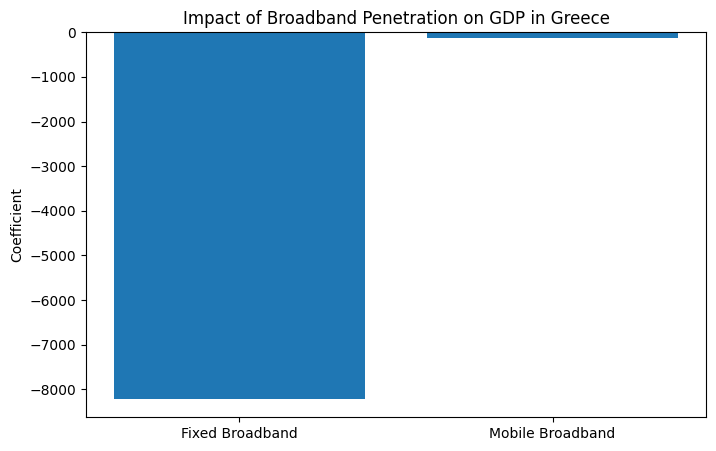

In [42]:
# Load your data
data = pd.read_csv('FinalDataSet.csv')
data = data.set_index(['Country Name', 'Year'])

# Preparing the data for Panel Data Analysis
dependent_var = data['GDP(milUSD)']
independent_vars = data[['FixedBroadbandPenetration', 'MobileBroadbandPenetration']]

# Generate country-specific dummy variables
country_dummies = pd.get_dummies(data.index.get_level_values('Country Name'), drop_first=True)
country_dummies.index = data.index  # Aligning the index with the main data

# Creating interaction terms for Fixed and Mobile Broadband Penetration with country dummies
for country in country_dummies.columns:
    independent_vars[f'FixedBroadband_{country}'] = independent_vars['FixedBroadbandPenetration'] * country_dummies[country]
    independent_vars[f'MobileBroadband_{country}'] = independent_vars['MobileBroadbandPenetration'] * country_dummies[country]

# Adding a constant term for the regression equation
independent_vars = sm.add_constant(independent_vars)

# Creating the model - PanelOLS with interaction terms
extended_model = PanelOLS(dependent_var, independent_vars, entity_effects=True)

# Fitting the model
extended_results = extended_model.fit()

# Display the results
# print(extended_results.summary())

# Visualization of the results (example for one country - Greece)
# Extracting the coefficients for Greece's interaction terms
fixed_broadband_greece_coef = extended_results.params.get('FixedBroadband_Greece', 0)
mobile_broadband_greece_coef = extended_results.params.get('MobileBroadband_Greece', 0)

# Plotting the coefficients
plt.figure(figsize=(8, 5))
plt.bar(['Fixed Broadband', 'Mobile Broadband'], [fixed_broadband_greece_coef, mobile_broadband_greece_coef])
plt.title('Impact of Broadband Penetration on GDP in Greece')
plt.ylabel('Coefficient')
plt.show()


In [43]:
print(f"Fixed Broadband Greece Coefficient: {fixed_broadband_greece_coef}")
print(f"Mobile Broadband Greece Coefficient: {mobile_broadband_greece_coef}")

Fixed Broadband Greece Coefficient: -8213.835136881342
Mobile Broadband Greece Coefficient: -123.74075976021236
